In [1]:
# Import whatever will be used in this notebook
import pylab
import math
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Import from sklearn
#Estimators:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Set generation 
from sklearn.model_selection import train_test_split

#Performance metrics:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#K-fold crossvalidation
from sklearn.model_selection import KFold

In [2]:
# Surpress warnings regarding the version of the pandas library which is used 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Make variable for the imported models
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelLR = LogisticRegression()
modelKNN = KNeighborsClassifier

In [4]:
#read in the csv file and remove the extra ID column
credit = pd.read_csv("C:\\Users\\Jeroen\\Desktop\\Ubiqum\\Data Science\\Excel Files\\credit_1.csv", header = 0)
credit = credit[credit.columns[1:len(credit.columns)]]

In [5]:
#Give head of the df so it is easily visible which vars should function as independent variable
credit.head()

,ID,CREDIT,SEX,EDUCATION,MARRIAGE,AGE,PAYSTAT_APR,PAYSTAT_MAY,PAYSTAT_JUNE,PAYSTAT_JULY,...,CUR_BIL_JULY,CUR_BIL_AUG,CUR_BIL_SEP,PAID_APR,PAID_MAY,PAID_JUNE,PAID_JULY,PAID_AUG,PAID_SEP,DEFAULT
0,1,20000,Female,University,Single,24,-2,-2,-1,-1,...,689,3102,3913,0,0,0,0,689,0,Defaults
1,2,120000,Female,University,Married,26,2,0,0,0,...,2682,1725,2682,2000,0,1000,1000,1000,0,Defaults
2,3,90000,Female,University,Married,34,0,0,0,0,...,13559,14027,29239,5000,1000,1000,1000,1500,1518,Pays
3,4,50000,Female,University,Single,37,0,0,0,0,...,49291,48233,46990,1000,1069,1100,1200,2019,2000,Pays
4,5,50000,Male,University,Single,57,0,0,0,-1,...,35835,5670,8617,679,689,9000,10000,36681,2000,Pays


In [6]:
#Select the features that will function as independent variables:
credit_indep = credit.iloc[:, 12:(len(credit.columns)-1)]
credit_indep.head()

,CUR_BIL_APR,CUR_BIL_MAY,CUR_BIL_JUNE,CUR_BIL_JULY,CUR_BIL_AUG,CUR_BIL_SEP,PAID_APR,PAID_MAY,PAID_JUNE,PAID_JULY,PAID_AUG,PAID_SEP
0,0,0,0,689,3102,3913,0,0,0,0,689,0
1,3261,3455,3272,2682,1725,2682,2000,0,1000,1000,1000,0
2,15549,14948,14331,13559,14027,29239,5000,1000,1000,1000,1500,1518
3,29547,28959,28314,49291,48233,46990,1000,1069,1100,1200,2019,2000
4,19131,19146,20940,35835,5670,8617,679,689,9000,10000,36681,2000


In [7]:
#Select the dependent variable and turn it into a seperate vector:
credit_dep = credit['DEFAULT']
credit_dep.head()

0    Defaults
1    Defaults
2        Pays
3        Pays
4        Pays
Name: DEFAULT, dtype: object

In [8]:
#generate a dataframe that functions as a trainingset

X_train, X_test, y_train, y_test = train_test_split(credit_indep, credit_dep, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21000, 12) (21000,)
(9000, 12) (9000,)


In [9]:
# Do a Kfold cross validation on the training data for k = 5

knn = KNeighborsClassifier(n_neighbors = 5)
CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.7576663277507059


In [10]:
# Do a Kfold cross validation on the training data to select optimal K 
k_range = range(30,40)
k_scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    CVscores = cross_val_score(knn, X_train, y_train, cv = 10, scoring = "accuracy")
    k_scores.append(CVscores.mean())
print(k_scores)

[0.7808568083683508, 0.7813331350069737, 0.7809043820860817, 0.7815713663427136, 0.7814284637835843, 0.7818093028398161, 0.7816661735232657, 0.7819047450275309, 0.7816189626174086, 0.7818095069106971]


Text(0,0.5,'Cross validation score')

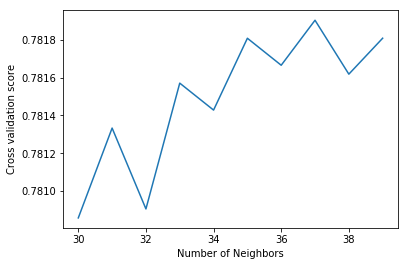

In [11]:
plt.plot(k_range, k_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross validation score')

In [12]:
# Check classification accuracy using the top K that was retrieved from the Knn cross-validation
knn = KNeighborsClassifier(n_neighbors = k_range[((k_scores.index(max(k_scores))))])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7815555555555556


In [13]:
# Do a Kfold cross validation on the training data for a logistic regression

logregression = LogisticRegression(solver='liblinear')
CVscores = cross_val_score(logregression, X_train, y_train, cv = 10, scoring = "accuracy")
print(CVscores.mean())

0.7818095522405852


In [14]:
# Check classification accuracy using the logregression

logregression.fit(X_train, y_train)
y_pred = logregression.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7811111111111111


In [15]:
#train using a Support vector machine, a random forest and a logistic regression, 

modelSVC.fit(X_train, y_train)
modelRF.fit(X_train, y_train)
modelLR.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
#Print cross-validation scores 

print(cross_val_score(modelSVC, X_train, y_train)) 
print(cross_val_score(modelRF, X_train, y_train)) 
print(cross_val_score(modelLR, X_train, y_train)) 

[0.78117412 0.78285714 0.78139734]
[0.76189116 0.763      0.7638234 ]
[0.78160263 0.78214286 0.78125446]


In [17]:
#Print model validation scores 

print(modelSVC.score(X_train, y_train))
print(modelRF.score(X_train, y_train))
print(modelLR.score(X_train, y_train))

0.9867619047619047
0.9775714285714285
0.7818571428571428
